In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Data

In [2]:
df = pd.read_csv('/Users/beyazituysal/Documents/PythonProjects/MLalgorithm/datasets/heart_classification_data.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We cannot call this code as there is no object64 in the dataset

code = df.describe(exclude=np.number).T

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
# Showing float columns
df.select_dtypes('float64').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   oldpeak  303 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [10]:
# Showing float columns
df.select_dtypes('int64').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalachh  303 non-null    int64
 8   exng      303 non-null    int64
 9   slp       303 non-null    int64
 10  caa       303 non-null    int64
 11  thall     303 non-null    int64
 12  output    303 non-null    int64
dtypes: int64(13)
memory usage: 30.9 KB


# EDA

In [12]:
df.groupby('output').agg(['mean', 'median'])

age              sex               cp             trtbps         \
             mean median      mean median      mean median        mean median   
output                                                                          
0       56.601449   58.0  0.826087    1.0  0.478261    0.0  134.398551  130.0   
1       52.496970   52.0  0.563636    1.0  1.375758    2.0  129.303030  130.0   

              chol         ...      exng          oldpeak              slp  \
              mean median  ...      mean median      mean median      mean   
output                     ...                                               
0       251.086957  249.0  ...  0.550725    1.0  1.585507    1.4  1.166667   
1       242.230303  234.0  ...  0.139394    0.0  0.583030    0.2  1.593939   

                    caa            thall         
       median      mean median      mean median  
output                                           
0         1.0  1.166667    1.0  2.543478    3.0  
1         2.0  0.363636    0.0  2.121212    2.0  

[2 rows x 26 columns]

In [13]:
# Standard deviation
df.groupby('output').std()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762
1,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752


## Box Plot

<AxesSubplot: xlabel='output', ylabel='oldpeak'>

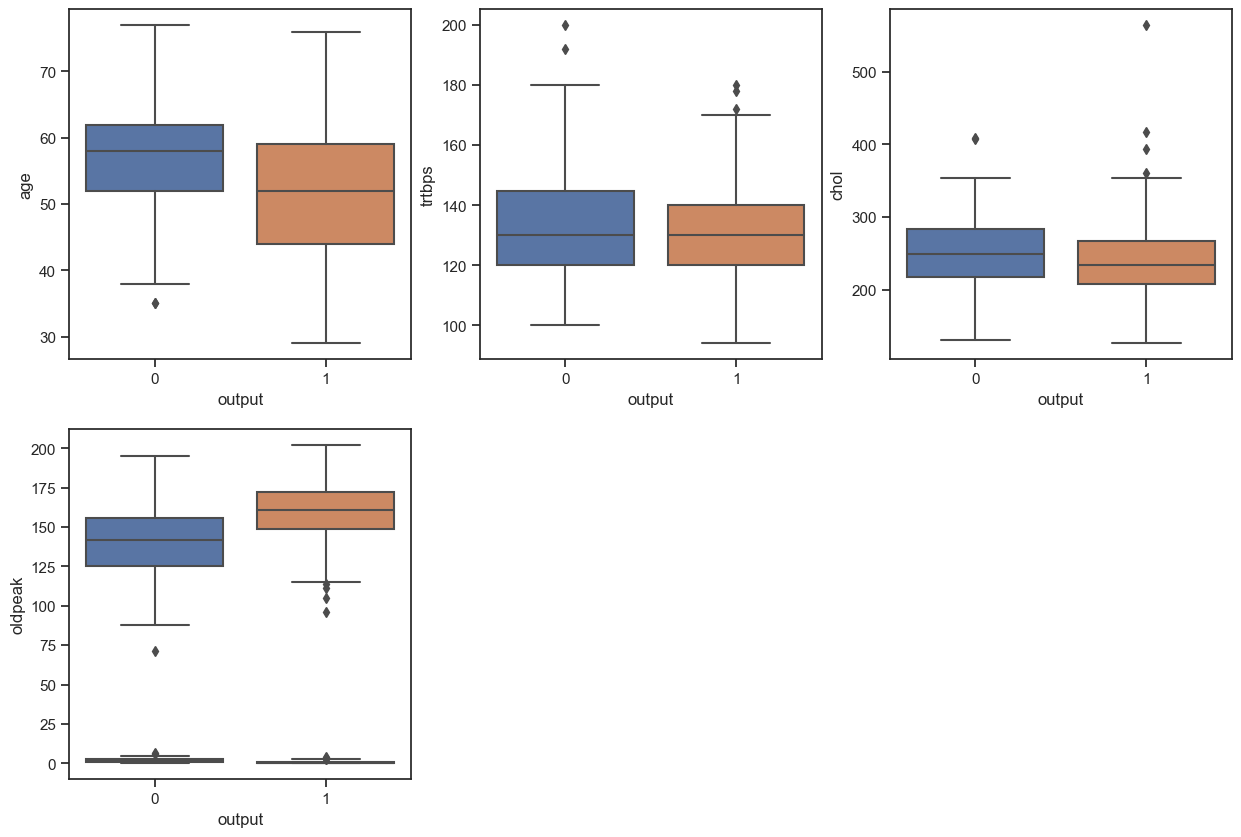

In [19]:
sns.set(style='ticks')
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x='output', y='age', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='output', y='trtbps', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='output', y='chol', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='output', y='thalachh', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='output', y='oldpeak', data=df)

##### There are too many outliers in the dataset.

## Violin Plot

<AxesSubplot: xlabel='output', ylabel='oldpeak'>

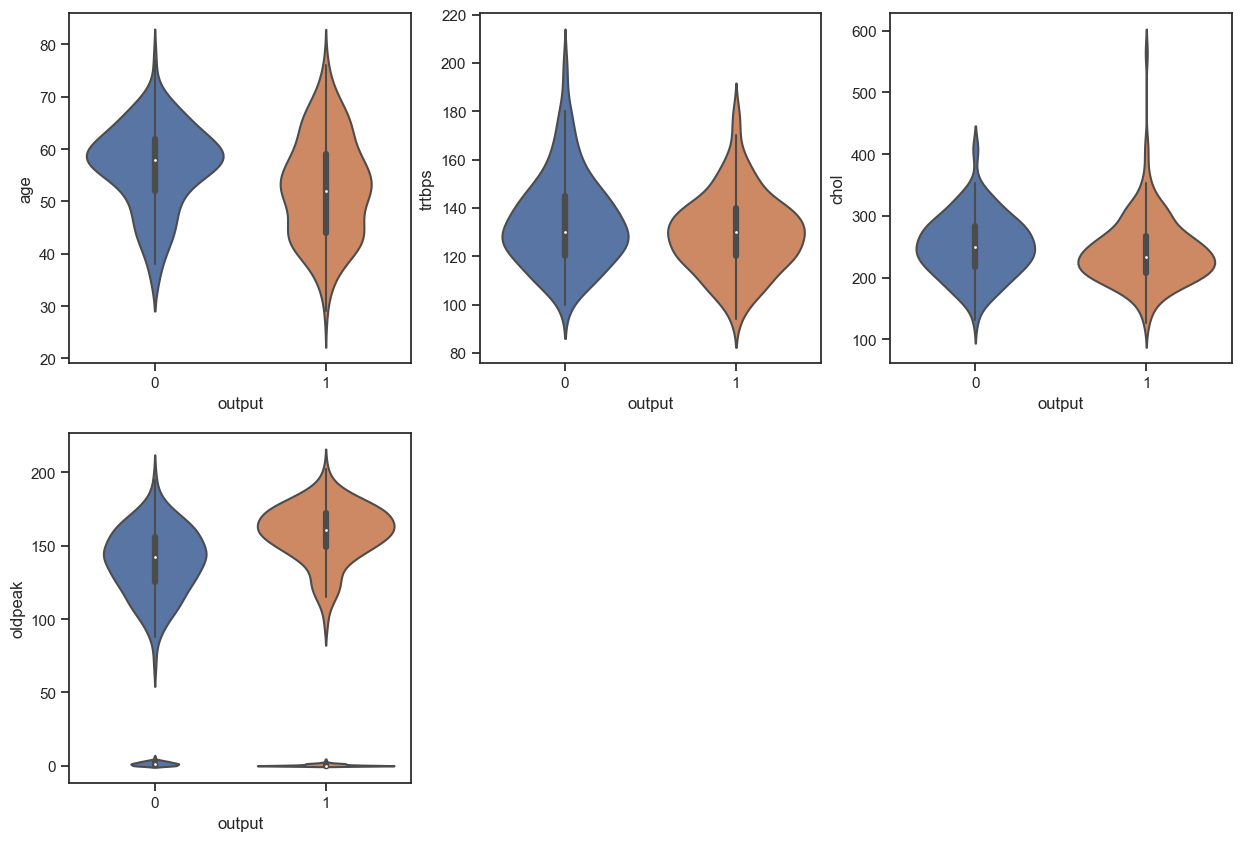

In [20]:
sns.set(style='ticks')
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.violinplot(x='output', y='age', data=df)
plt.subplot(2,3,2)
sns.violinplot(x='output', y='trtbps', data=df)
plt.subplot(2,3,3)
sns.violinplot(x='output', y='chol', data=df)
plt.subplot(2,3,4)
sns.violinplot(x='output', y='thalachh', data=df)
plt.subplot(2,3,4)
sns.violinplot(x='output', y='oldpeak', data=df)

In [21]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


[]

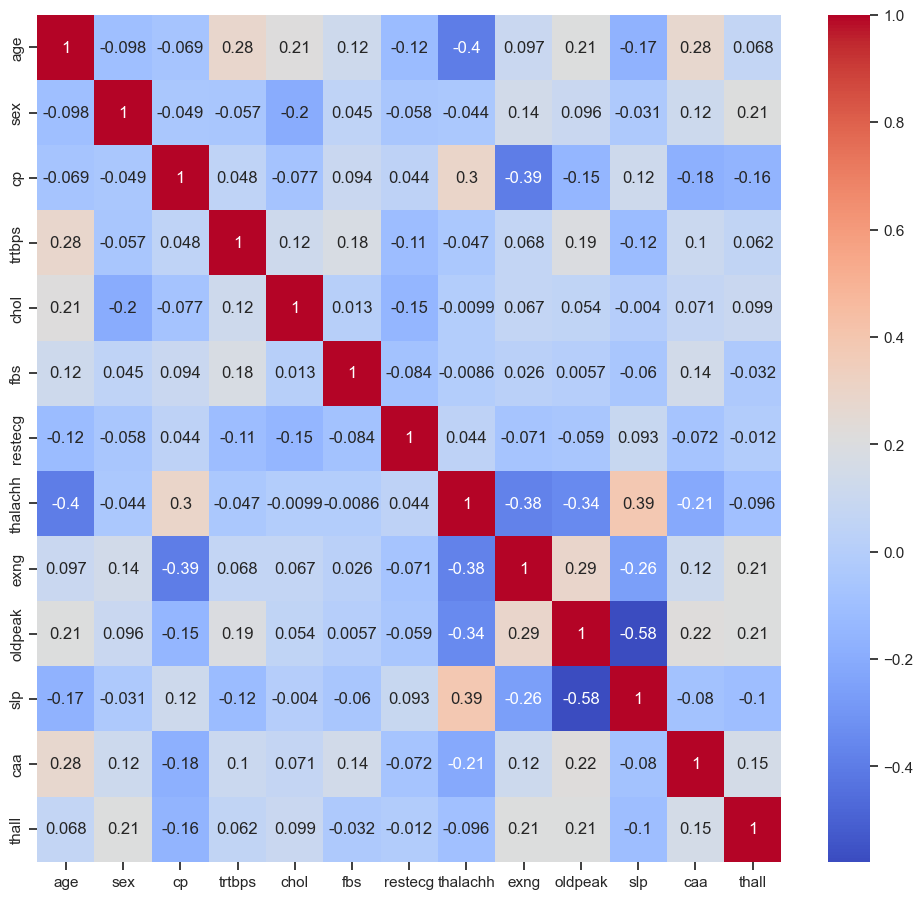

In [29]:
df_without_output = df.drop(['output'], axis=1)
plt.figure(figsize=(12,11))
sns.heatmap(df_without_output.corr(), annot=True, cmap='coolwarm')
plt.plot()

<AxesSubplot: title={'center': 'slp and thalachh'}, xlabel='slp', ylabel='thalachh'>

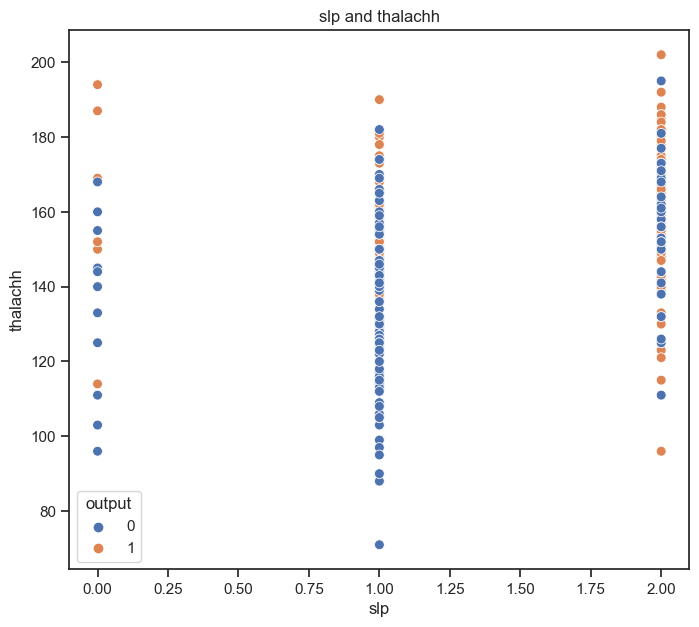

In [30]:
plt.figure(figsize=(8,7))
plt.title('slp and thalachh')
sns.scatterplot(data=df,x='slp',y='thalachh',hue='output',s=50)